In [1]:
import mmf_setup;mmf_setup.nbinit(hgroot=False)
import numpy as np
from importlib import reload
from scipy.optimize import brentq
import homogeneous;reload(homogeneous)
from homogeneous import Homogeneous1D,Homogeneous3D
%pylab inline --no-import-all

<IPython.core.display.Javascript object>

Populating the interactive namespace from numpy and matplotlib


# Fulde-Ferrell State

In [2]:
h = Homogeneous3D(T=0, q=0)
k0 = 1.0
mu = k0**2/2
eF = mu/0.5906055
kF = np.sqrt(2*eF)
n_p = kF**3/3/np.pi**2
mus_eff = (mu,)*2
delta = 1.16220056*mus_eff[0] 
ainv, n, mu = h.get_BCS_v_n_e_in_cylindrical(
    delta=delta, mus_eff=mus_eff, k_c=100.0)
print(f"ainv={ainv}\tn=({n})\tmu=({mu})")
(n.sum(), n_p)

Computing Density Difference...
Computing Total Density...


c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)


ainv=-1.4425956741930673e-07	n=([0.03720512 0.03720512])	mu=((0.5, 0.5))


c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)


(0.07441024762302698, 0.07441025098046673)

In [3]:
h = Homogeneous3D(T=0, q=0.9)
k0 = 1.0
mu = k0**2/2
delta = 1.16220056*mu
dmu = 1.1*delta
eF = mu/0.5906055
kF = np.sqrt(2*eF)
mus_eff = (mu+dmu, mu-dmu)
ainv, n, mu = h.get_BCS_v_n_e_in_cylindrical(
    delta=delta, mus_eff=mus_eff, k_c=100.0)
print(f"ainv={ainv}\tn=({n})\tmu=({mu})")

c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  **opt)


Computing Density Difference...


E:\Projects\Physics\quantum-fermion-theories\quantum-turbulence\homogeneous.py:54: UserWarning: Density Difference integral did not converge: res, err = 0.06426339804174305, 2.9533314217572006e-06
  f"{int_name} integral did not converge: res, err = {res}, {err}")


Computing Total Density...
ainv=2.7106966770761347	n=([0.01506111 0.01180549])	mu=((1.139210308, -0.13921030800000012))


E:\Projects\Physics\quantum-fermion-theories\quantum-turbulence\homogeneous.py:54: UserWarning: Total Density integral did not converge: res, err = 0.5303254336818848, 1.0471829374369434e-06
  f"{int_name} integral did not converge: res, err = {res}, {err}")


# Special Momenta

$$
  \epsilon_\pm = \frac{\epsilon_a \pm \epsilon_b}{2}, \qquad
  \mu_{\pm} = \frac{\mu_a \pm \mu_b}{2}\\
  \epsilon_- = \frac{2\hbar^2qk_z }{m}- \mu_-, \qquad
  \epsilon_+ = \frac{\hbar^2k_z^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+,\\
  \omega_{\pm} = \epsilon_- \pm \sqrt{\epsilon_+^2 + \Delta^2}
$$

The special momenta occur when $\omega_{\pm}=0$ or $\epsilon_- = \mp \sqrt{\epsilon_+^2+\Delta^2}$.

$$
  \epsilon_-^2 = \epsilon_+^2 + \Delta^2
$$

In 3d case:
$$
\epsilon_+ = \frac{\hbar^2k_z^2}{2m}+\frac{\hbar^2k_{\perp}^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+,\\
$$

# To Do For Chunde:

Derive integrals for FF state.

* $P = \mu_+n_+ + \mu_- n_- - \mathcal{E}$.


* You can easily compute $P(\mu_+, \mu_-, \Delta, q)$ and $a_s^{-1}(\mu_+, \mu_-, \Delta, q)$.
* Solve $a_s^{-1} = a_s^{-1}(\mu_+, \mu_-, \Delta, q)$ to get $\Delta(\mu_+,\mu_-, q, a_s^{-1})$. (Recall, there may be no solution - you must also always consider the normal phase $\Delta=0$.)
* Now maximize, including $P(\mu_+, \mu_-, \Delta=0, q)$:

  $$
    \max_{q} P(\mu_+, \mu_-, a_s^{-1}, q).
  $$

## BdG 
We start with the issue of regularization.  The $T=0$ equations in $d$ dimensions can be expressed in terms of the gap $\Delta$ and effective chemical potential $\mu_{\text{eff}} = \mu_0 + g_cn_+/2$ where $g_c>0$ represents an attractive interaction:

$$
  \Delta = g_c \nu_c, \qquad
  \mu_{eff}-\mu_0=g_cn_+/2\qquad
  \epsilon_+ = \frac{\hbar^2k^2}{2m} - \mu_{\text{eff}}, \qquad
  \mathcal{E} = \frac{E}{V} 
              = \frac{\hbar^2\tau_c}{2m} - g_c(n_an_b+\nu_c^\dagger\nu_c)
              = \frac{\hbar^2\tau_c}{2m} - \Delta^\dagger\nu_c - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2},
$$

through the following integrals:
  
\begin{align}
  \nu_c &= \int_{c}\frac{\d^d{k}}{(2\pi)^d}\;\frac{\Delta}{2\sqrt{\epsilon_+^2 + \Delta^2}}
  &&\sim \int_{c}\frac{\d^d{k}}{(2\pi)^d}\;\frac{m\Delta}{\hbar^2 k^2},\tag{1}\\
  \tau_c &= \int_c\frac{\d^d{k}}{(2\pi)^d}\; k^2
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\; 
  \frac{2m^2\abs{\Delta}^2}{\hbar^4 k^2},\tag{2}\\
  n_+ &= \int_c\frac{\d^d{k}}{(2\pi)^d}
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\; 
  \frac{2m^2\abs{\Delta}^2}{\hbar^4 k^4}. \tag{3}\\
  \kappa_c &=\int_c\frac{\d^d{k}}{(2\pi)^d}\;\left(\frac{\hbar^2\tau_c}{2m} - \Delta^\dagger \nu_c\right) 
  &&\sim \int_c\frac{\d^d{k}}{(2\pi)^d}\;\frac{2m^2\abs{\Delta}^2\mu_{\text{eff}}}{\hbar^4 k^4},\tag{4}
\end{align}

The total kinetic energy is $\tau_+=\tau_a + \tau_b$:

$$
\tau_+ = \int_c\frac{\d^d{k}}{(2\pi)^d}((k+q)^2+(-k+q)^2)\left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]\\
\tau_+ = 2\int_c\frac{\d^d{k}}{(2\pi)^d}(k^2+q^2)\left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right]
$$

## Inverse scattering length

\begin{align}
\frac{1}{v_0} 
  &=\frac{m}{4\pi\hbar^2 a}- \frac{1}{2} \int_c\frac{d^3k}{(2\pi)^3}{\frac{1}{\frac{\hbar^2k^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+}}\\
   &=\frac{m}{4\pi\hbar^2 a}- \Lambda\\
\Lambda 
&= \frac{1}{2} \int_c\frac{d^3k}{(2\pi)^3}{\frac{1}{\frac{\hbar^2k^2}{2m} + \frac{\hbar^2q^2}{2m} - \mu_+}}\\
&=\frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{k_c+k_0}{k_c-k_0}\right)
\end{align}
where
$$
  \frac{\hbar^2k_0^2}{2m} - (\mu_+ - \frac{\hbar^2q^2}{2m}) = 0, \qquad
  \frac{\hbar^2k_c^2}{2m} - (\mu_+ - \frac{\hbar^2q^2}{2m})= E_c
$$

\begin{align}
\frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} &=\frac{1}{v_0}- \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)
\end{align}
where
$$
  \frac{k_0}{k_c} = \sqrt{\frac{\mu_+ - \frac{\hbar^2q^2}{2m}}{E_c + \mu_+ - \frac{\hbar^2q^2}{2m}}}
$$


\begin{align}
\frac{1}{v_0} &= \frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\\
\frac{1}{\Delta}\nu_c &= \frac{m}{4\pi\hbar^2}a(\mu_+,\mu_-,\delta,q)^{-1} + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\\
\end{align}

Substituting the integral for $\nu_c$ yields:

\begin{align}
\int_{c}\frac{dk^3}{(2\pi)^3}\frac{1}{2\sqrt{\epsilon_+^2 + \Delta^2}}\left(f(\omega_-)-f(\omega_+)\right) &= \frac{m}{4\pi\hbar^2}a^{-1}(\mu_+,\mu_-,\delta,q) + \frac{m}{\hbar^2}\frac{k_c}{2\pi^2} \left(1 - \frac{k_0}{2k_c}\ln\frac{1+k_0/k_c}{1-k_0/k_c}\right)\tag{5}\\
\end{align}

## Pressure integral

### The total energy density

\begin{align}
\mathcal{E} &= \frac{E}{V}= \frac{\hbar^2\tau_+}{2m} - g_c(n_an_b+\nu_c^\dagger\nu_c) \\
              &= \frac{\hbar^2\tau_+}{2m} - \Delta^\dagger\nu_c - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}\\
              &= - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2} +\frac{\hbar^2\tau_+}{2m} - \Delta^\dagger\nu_c \\
              \mathcal{E}&= \frac{\hbar^2}{2m}\int_c\frac{\d^3{k}}{(2\pi)^3}k^2
    \left[1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right] - \Delta^\dagger\int_{c}\frac{\d^3{k}}{(2\pi)^3}\frac{\Delta}{2\sqrt{\epsilon_+^2 + \Delta^2}} - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}\\
    &= \int_c\frac{\d^3{k}}{(2\pi)^3}
    \left[\frac{\hbar^2k^2}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right] - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2},
\end{align}

### Grand Canonical Potential

\begin{align}
P(q)&=
\mu_+n_+ + \mu_-n_- - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}-( \frac{\hbar^2\tau_c}{2m} - \Delta^\dagger\nu_c )\\
&=\mu_+n_+ + \mu_- n_- - \frac{(\mu_{\text{eff}} - \mu_0)n_+}{2}- \int_c\frac{k_{\perp}dk_{\perp}dk_z}{(2\pi)^2}
\left[\frac{\hbar^2(k_{\perp}^2+(k_z+q)^2)}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right]\\
&=\mu_+\int_c\frac{d^3k}{(2\pi)^3}\left(1 - \frac{\epsilon^+_k}{E_k}\bigl(f(\omega_-) - f(\omega_+)\bigr)\right) + \mu_- \int\frac{\d^3{k}}{(2\pi)^3}\bigl(f(\omega_+) - f(-\omega_-)\bigr) - \int_c\frac{k_{\perp}dk_{\perp}dk_z}{(2\pi)^2}
\left[\frac{\hbar^2(k_{\perp}^2+(k_z+q)^2)}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right] \\
&=\int_c\frac{d^3k}{(2\pi)^3}
\left[\mu_+\left(1 - \frac{\epsilon^+_k}{E_k}\bigl(f(\omega_-) - f(\omega_+)\bigr)\right) + \mu_- \bigl(f(\omega_+) - f(-\omega_-)\bigr) - \frac{\hbar^2k^2}{2m}\left(1 - \frac{\epsilon_+}{\sqrt{\epsilon_+^2 + \abs{\Delta}^2}}\right) - \frac{\Delta^2}{2\sqrt{\epsilon_+^2 + \Delta^2}}\right]\tag{6}\\  
\end{align}

## Maximize $P(\mu_+,\mu_-,\Delta,q)$
For any given $\mu s$ and scattering length, to maximize $P$ is equivalent to have $\frac{\partial P}{\partial q} = 0$, and $q$ shows up in any $k_z$, so in any part of the equation depends on $k$:

In [2]:
import FuldeFerrelState
reload(FuldeFerrelState)
from FuldeFerrelState import get_pressure,get_inv_scattering_len

In [3]:
qs = np.linspace(0,10,10)
np.random.seed(1)
m, hbar, kF = 1 + np.random.random(3)
eF = (hbar*kF)**2/2/m
nF = kF**3/3/np.pi**2
mu = 0.59060550703283853378393810185221521748413488992993*eF
delta = 0.68640205206984016444108204356564421137062514068346*eF
args = dict(mu_a=mu, mu_b=mu, delta=delta, m_a=m, m_b=m, hbar=hbar, T=0.0)

In [4]:
ps = [get_pressure(mu_a = mu,mu_b=mu,delta=delta,m=m,T=0,q=q).n for q in qs]

c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  **opt)
c:\users\chunde\appdata\local\programs\python\python37\lib\site-packages\scipy\integrate\quadpack.py:860: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  **opt)
c:\users\chunde\appdata\local\programs\pyt

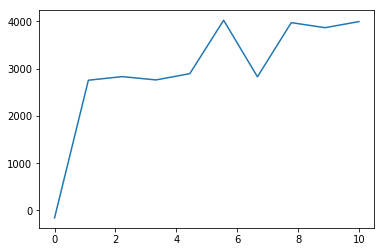

In [5]:
plt.plot(qs,ps)

# Mixed states

$$
  \mu = \pdiff{\mathcal{E}(n)}{n}, \qquad
  n = \pdiff{P(\mu)}{\mu}, \qquad
  P = \mu n - \mathcal{E}, \qquad
  \mathcal{E} = \mu n - P,\\
  \mathcal{E}_1 = n^2, \qquad
  \mathcal{E}_2 = 1 + (n-1)^2\\
  \mu_1 = 2n, \qquad \mu_2 = 2(n-1)\\
  n_1 = \mu/2, \qquad n_2 = 1+\mu/2\\
  P_1 = \frac{\mu^2}{4}, \qquad
  P_2 = \mu - 1 + \frac{\mu^2}{4}
$$

First order transition at $\mu_c = 1$, $P=\mu_c^2/4$, with $n \in (\mu/2, 1 + \mu/2)$ and
$\mathcal{E} = \mu_c n - \mu_c^2/4$.

In [ ]:
n = np.linspace(0,2,100)
mu_c = 1
E1 = n**2
E2 = 1+(n-1)**2
n_mix = np.linspace(mu_c/2, 1+mu_c/2, 100)
E_mix = mu_c*n_mix - mu_c**2/4

plt.subplot(121)
plt.plot(n, E1, n, E2)
plt.plot(n_mix, E_mix, '-k')
plt.xlabel(r'$n$'); plt.ylabel(r'$\mathcal{E}$');

mu = np.linspace(0, 2, 100)
P1 = mu**2/4
P2 = mu**2/4 + mu - 1
ax = plt.subplot(122); ax.yaxis.tick_right()
plt.plot(mu, P1, mu, P2)
plt.plot(mu, np.maximum(P1, P2), 'k')
plt.xlabel(r'$\mu$'); plt.ylabel('$P$');

# FF States

In [ ]:
Delta = 0.1
k_z = np.linspace(0, 2, 100)
k_perp = 0.9
q = .0
kF = 1.0

dmu = 1.1*Delta
E = np.sqrt(((k_z**2 + k_perp**2 + q**2)/2 - kF**2/2)**2 + Delta**2)
Em = 2*q*k_z - dmu
wp = Em + E
wm = Em - E

plt.plot(k_z, wp)
plt.plot(k_z, wm)
plt.axhline(0, ls=':', c='y')


# Scattering length check in unitary case

In [ ]:
h3 = Homogeneous3D(T=0.0)
k0 = 1.0
mu = k0**2/2
eF = mu/0.5906055
kF = np.sqrt(2*eF)
n_p = kF**3/3/np.pi**2
mus_eff = (mu,)*2
delta =  1.16220056*mus_eff[0]
k_c = 10.0
Lambda = h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k_c)/4/np.pi
Lambda, -k_c/2/np.pi**2*k0/2/k_c*np.log((k_c+k0)/(k_c-k0)),k0**3/3/np.pi**2 

In [ ]:
kc =np.linspace(1,20,20)
plt.plot(kc,[h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k)/4/np.pi for k in kc])

In [ ]:
kc =np.linspace(20,200,20)
plt.plot(kc,[h3.get_inverse_scattering_length(mus_eff=mus_eff, delta=delta, k_c=k)/4/np.pi for k in kc])